In [1]:
# import dataiku
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
from numerize import numerize

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("C:/Users/w510663/Desktop/Pyri/connections/")
from conn import snowflake_conn

# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT *
    FROM "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_NAF_PM_INCLUSION_ACCT_SCORING"
    WHERE YEAR(REF_DATE) IN (2022)
;
''')
inclusion = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', inclusion.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

inclusion.head()

Failed to import ArrowResult. No Apache Arrow result set format can be used. ImportError: DLL load failed while importing arrow_iterator: The specified procedure could not be found.


Data Shape: (3873889, 53) 
Execution time: 3.754063061873118 minutes


,CUST_ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,EXCL_FRAUD_FLAG,EXCL_EFPS_FLAG,WX_CUST_SUSP_CLASS,GOVERNMENT_FLG,WX_CR_RATING_DATE_TO_REF_DATE,EARLIEST_ACTIVE_DATE_TO_REF_DATE,ALL_EXCL_FLAGS_SUM,RETRAIN_EXCL_FLAGS_SUM,EXCL_FLAG_GROUP,CR_LIMIT
0,9100003861765,FSC,2022-09-01 00:00:00-07:00,42,76,0,NaN,NaN,0.114716,17.0,...,0,0,X,N,2269,605,0,0,Inclusion,11000.0
1,9100005148684,FSC,2022-09-01 00:00:00-07:00,54,48,0,7.0,1.0,2.348402,0.0,...,0,0,O,N,1450,587,0,0,Inclusion,1500.0
2,9100004374216,REV,2022-09-01 00:00:00-07:00,23,61,1,0.5,10.0,0.259428,0.0,...,0,0,O,N,1842,608,0,0,Inclusion,52400.0
3,9100009334737,REV,2022-09-01 00:00:00-07:00,54,14,1,7.0,4.0,1.175854,0.0,...,0,0,O,N,426,415,0,0,Inclusion,5000.0
4,9100005639094,REV,2022-09-01 00:00:00-07:00,56,47,1,NaN,NaN,0.332902,5.0,...,0,0,O,N,1409,608,0,0,Inclusion,1300.0


In [3]:
# Get execution time
st = time.time()

cur.execute('''
    SELECT *
    FROM "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_NAF_PM_SCOPE_EXCLUSION_ACCT_SCORING"
    WHERE YEAR(REF_DATE) IN (2022)
;
''')
exclusion = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', exclusion.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

exclusion.head()

Data Shape: (446920, 53) 
Execution time: 0.38181178967157997 minutes


,CUST_ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,EXCL_FRAUD_FLAG,EXCL_EFPS_FLAG,WX_CUST_SUSP_CLASS,GOVERNMENT_FLG,WX_CR_RATING_DATE_TO_REF_DATE,EARLIEST_ACTIVE_DATE_TO_REF_DATE,ALL_EXCL_FLAGS_SUM,RETRAIN_EXCL_FLAGS_SUM,EXCL_FLAG_GROUP,CR_LIMIT
0,9100004753971,FSC,2022-09-01 00:00:00-07:00,72,55,0,NaN,6.0,0.982498,27.0,...,0,0,K,Y,1661,608,1,0,GOV,800.0
1,9100006825474,CHV,2022-09-01 00:00:00-07:00,54,46,0,NaN,NaN,0.718247,0.0,...,0,1,O,N,1365,587,1,0,EFPS,6600.0
2,9100003243591,FSC,2022-09-01 00:00:00-07:00,62,93,0,NaN,NaN,0.773572,5.0,...,0,0,K,Y,2778,608,1,0,GOV,1100.0
3,9100007736715,FSC,2022-09-01 00:00:00-07:00,48,34,0,NaN,91.0,0.729664,6.0,...,0,0,O,Y,1030,608,2,0,GOV,250000.0
4,9100002517867,FSC,2022-09-01 00:00:00-07:00,53,108,0,NaN,NaN,0.880316,0.0,...,0,1,O,N,3240,608,1,0,EFPS,5900.0


In [4]:
# Drop model unused from the dataset
cols_to_drop = ['SETID', 'A_BUSINESS_PROGRAM_C', 'A_MARKETING_CHANNEL_C', 'A_PORTFOLIO_C',
                'FLAG_90_DPD_366_DAYS', 'FLAG_CHARGEOFF_366_DAYS', 'proba_0',
                'EXCL_PORTFOLIO_FLAG', 'EXCL_CUST_STATUS_FLAG', 'EXCL_CUST_TENURE_FLAG',
                'EXCL_DUMMY_CREDIT_LIMIT_FLAG', 'EXCL_MATERIAL_DELINQUENCY_FLAG',
                'EXCL_CUST_CONVERSION_FLAG', 'EXCL_FRAUD_FLAG', 'WX_CR_RATING_DATE_TO_REF_DATE', 'EARLIEST_ACTIVE_DATE_TO_REF_DATE',
                'ALL_EXCL_FLAGS_SUM', 'RETRAIN_EXCL_FLAGS_SUM',
                'EXCL_GOV_VIP_FLAG', 'EXCL_LARGE_CREDIT_LIMIT_FLAG', 'EXCL_EFPS_FLAG', 'WX_CUST_SUSP_CLASS', 'GOVERNMENT_FLG',
]

cols_rename_map = {'CUST_ID': 'ID',
                   'FLAG_60_DPD_366_DAYS': 'target',
                   'proba_1': 'y_pred_proba',
                   'prediction': 'y_pred',
                   'TOTAL_EXPOSURE': 'TOTAL_EXPOSURE_12M',
}

incl = inclusion.copy()
incl = incl.drop(cols_to_drop, axis=1)
incl.rename(cols_rename_map, axis=1, inplace=True)

excl_acct = exclusion.copy()
excl_acct = excl_acct.drop(cols_to_drop, axis=1)
excl_acct.rename(cols_rename_map, axis=1, inplace=True)


gov = excl_acct[excl_acct['EXCL_FLAG_GROUP'] == 'GOV']
vip = excl_acct[excl_acct['EXCL_FLAG_GROUP'] == 'VIP']
efps = excl_acct[excl_acct['EXCL_FLAG_GROUP'] == 'EFPS']
at_150k = excl_acct[(excl_acct['EXCL_FLAG_GROUP'] == 'Large Credit Limit') & (excl_acct['CR_LIMIT'] == 150000)]
at_150k['EXCL_FLAG_GROUP'] = '150k Credit Limit'
over_150k = excl_acct[(excl_acct['EXCL_FLAG_GROUP'] == 'Large Credit Limit') & (excl_acct['CR_LIMIT'] > 150000)] 


# print out the shape of each dataframe
print('Inclusion:', incl.shape)
print('Government:', gov.shape)
print('VIP Non-Government:', vip.shape)
print('EPFS:', efps.shape)
print('150k Credit Limit:', at_150k.shape)
print('Over 150k Credit Limit:', over_150k.shape)

Inclusion: (3873889, 30)
Government: (175682, 30)
VIP Non-Government: (36142, 30)
EPFS: (199310, 30)
150k Credit Limit: (12962, 30)
Over 150k Credit Limit: (22824, 30)


In [5]:
# union all dataframes
df_combine = pd.concat([incl, gov, vip, efps, at_150k, over_150k])
df_combine.head()

,ID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,D_MAX_EXPOSURE_1M_N,...,T_TOTAL_TRX_NON_FUEL_PROPORTION_1M_N,T_SPREAD_GROSS_SPEND_6M_N,T_SPREAD_TOTAL_TRX_6M_N,T_SUM_GALLONS_1M_N,T_SPREAD_SUM_GALLONS_6M_N,target,y_pred_proba,y_pred,EXCL_FLAG_GROUP,CR_LIMIT
0,9100003861765,2022-09-01 00:00:00-07:00,42,76,0,NaN,NaN,0.114716,17.0,11113.68,...,0.000000,0.425089,0.400000,1341.583,0.443312,0,0.176240,0,Inclusion,11000.0
1,9100005148684,2022-09-01 00:00:00-07:00,54,48,0,7.0,1.0,2.348402,0.0,236.34,...,0.142857,2.097571,1.714286,102.519,2.317652,0,0.007578,0,Inclusion,1500.0
2,9100004374216,2022-09-01 00:00:00-07:00,23,61,1,0.5,10.0,0.259428,0.0,39857.19,...,0.009390,0.087706,0.078704,3806.885,0.080369,0,0.009268,0,Inclusion,52400.0
3,9100009334737,2022-09-01 00:00:00-07:00,54,14,1,7.0,4.0,1.175854,0.0,1364.59,...,1.000000,1.133553,0.878049,22.170,1.166711,0,0.056017,0,Inclusion,5000.0
4,9100005639094,2022-09-01 00:00:00-07:00,56,47,1,NaN,NaN,0.332902,5.0,984.82,...,0.500000,0.541291,0.493151,147.220,0.429665,0,0.016270,0,Inclusion,1300.0


### Overall Number of Accounts and Default Rate by Group

In [6]:
grouped = df_combine.groupby(['EXCL_FLAG_GROUP'])['target'].agg(['count', 'mean']).reset_index()
grouped.columns = ['Group', 'Number of Accounts', 'Default Rate']

# order by manual index
grouped = grouped.reindex([3, 2, 5, 1, 4, 0]).reset_index()
# grouped = grouped.sort_values(by='Number of Accounts', ascending=False).reset_index()

grouped

,index,Group,Number of Accounts,Default Rate
0,3,Inclusion,3873889,0.066694
1,2,GOV,175682,0.047045
2,5,VIP,36142,0.009905
3,1,EFPS,199310,0.000833
4,4,Large Credit Limit,22824,0.009376
5,0,150k Credit Limit,12962,0.028776


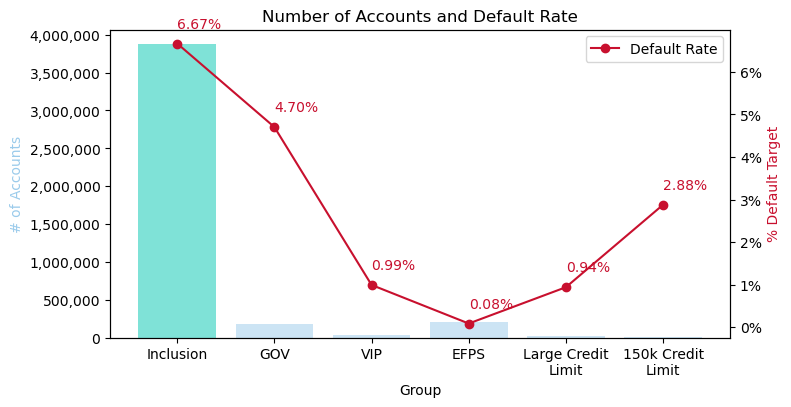

In [7]:
from textwrap import wrap

# Create a combination chart
fig, ax1 = plt.subplots(figsize=(8, 4))

ax2 = ax1.twinx()
ax1.bar(grouped.index, grouped['Number of Accounts'], color=['#9bcbeb' if i >= 1 else '#00c7b1' for i in grouped.index], alpha=0.5, label='Total')
ax2.plot(grouped.index, grouped['Default Rate'] * 100, color='#c8102e', marker='o', label='Default Rate')

ax1.set_xlabel('Group')
ax1.set_ylabel('# of Accounts', color='#9bcbeb')
# y label format as number with comma
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax2.set_ylabel('% Default Target', color='#c8102e')
# y label format as percent with 0 decimal place
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

# data label on ax2 as percent with 1 decimal place
for i, v in enumerate(grouped['Default Rate']):
    ax2.text(i, v * 100 + 0.3, "{:.2f}%".format(v * 100), color='#c8102e', ha='left', va='bottom')


plt.xticks(grouped.index, grouped['Group'])
# rotate xticks
# plt.setp(ax1.xaxis.get_majorticklabels(), rotation=65)

labels = [ '\n'.join(wrap(l, 15)) for l in grouped['Group']]
ax1.set_xticklabels(labels)

plt.title('Number of Accounts and Default Rate')
plt.legend(loc='upper right')
plt.show()

### Organize the datasets into a dictionary
This approach facilitates efficient access and manipulation.

In [8]:
df_flags = df_combine['EXCL_FLAG_GROUP'].unique()

# convert string to lowercase and replace space and / with underscore
converter = lambda x: x.lower().replace(" ", "_").replace("/", "_")
df_names = list(map(converter, df_flags))
print(df_names)

['inclusion', 'gov', 'vip', 'efps', '150k_credit_limit', 'large_credit_limit']


In [9]:
all_acct = df_combine.copy()

# Split data into inclusion/exclusion flags
df_list = {}

for e,l in zip(df_flags, df_names):
    d = all_acct.loc[all_acct['EXCL_FLAG_GROUP'] == e]
    d = d.drop(['EXCL_FLAG_GROUP'], axis=1)
    df_list[l] = d
    # Print each dataframe shape
    print(l, 'shape: ', df_list[l].shape)

inclusion shape:  (3873889, 29)
gov shape:  (175682, 29)
vip shape:  (36142, 29)
efps shape:  (199310, 29)
150k_credit_limit shape:  (12962, 29)
large_credit_limit shape:  (22824, 29)


### Calculate ROC-AUC, Presicion, Recall, and F1 Score

In [10]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve

fpr = {}
tpr = {}
fpr_tpr_threshold = {}
roc_auc = {}
precision = {}
recall = {}
f1 = {}
precision_recall_threshold = {}
pr_auc = {}

for i,j in zip(df_list, df_flags):
    # Calculate ROC curve and AUC
    fpr[j], tpr[j], fpr_tpr_threshold[j] = roc_curve(df_list[i]['target'], df_list[i]['y_pred_proba'])
    roc_auc[j] = auc(fpr[j], tpr[j])

    # Calculate precision-recall curve and AUC
    precision[j], recall[j], precision_recall_threshold[j] = precision_recall_curve(df_list[i]['target'], df_list[i]['y_pred_proba'])
    pr_auc[j] = auc(recall[j], precision[j])
    f1[j] = 2*precision[j]*recall[j]/(precision[j]+recall[j])

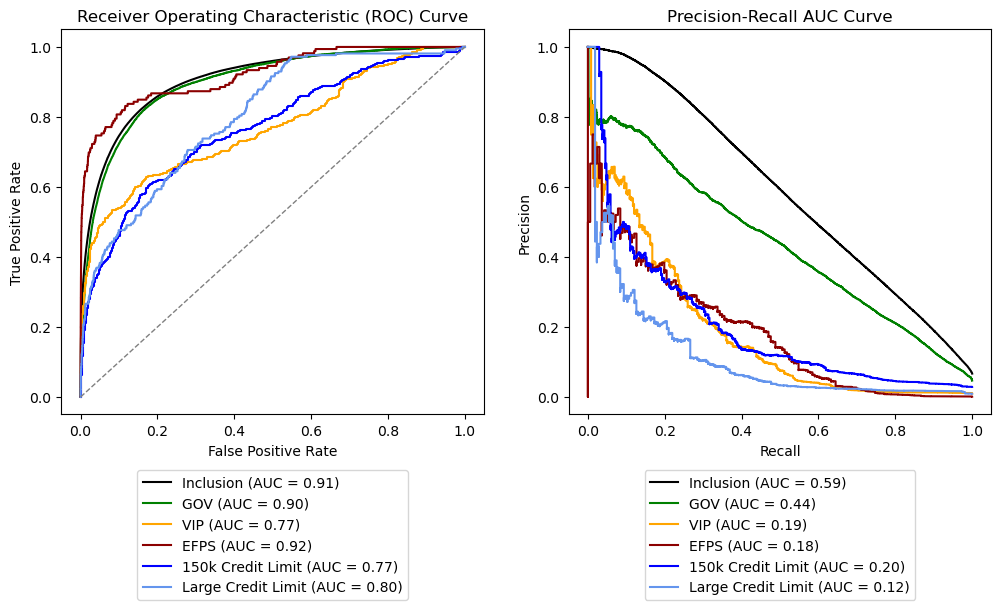

In [11]:
# Plot ROC-AUC and PR-AUC side by side
plt.figure(figsize=(12, 5))

colors = ['black', 'green', 'orange', 'darkred', 'blue', 'cornflowerblue']
lines = []
lines2 = []
to_plot = df_flags

plt.subplot(1, 2, 1)
for p,c in zip(to_plot, colors):
    lines += plt.plot(fpr[p], tpr[p], color=c, lw=1.5, label=f'{p} (AUC = {roc_auc[p]:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
labels = [l.get_label() for l in lines]
# plot legend outside of plot
plt.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.subplot(1, 2, 2)
for p,c in zip(to_plot, colors):
    lines2 += plt.step(recall[p], precision[p], color=c, where='post', label=f'{p} (AUC = {pr_auc[p]:.2f})')
labels2 = [l.get_label() for l in lines2]
# move legend to lower center outside of plot
plt.legend(lines2, labels2, loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall AUC Curve')

# plt.tight_layout()
plt.show()

In [12]:
def calculate_decile_table(binded, bins):
    result = []

    binded = binded.sort_values("y_pred_proba", ascending = False)
    binded["DECILE"] = pd.qcut(binded["y_pred_proba"].rank(method='first'), q = bins, labels = list(range(bins, 0, -1)))
    binded["TOTAL_EVENT_RATE"] =  binded["target"].mean()

    # Calculate the number of accounts and default accounts for each decile
    decile_df = binded.groupby("DECILE").agg(
        COUNT=("y_pred_proba", "count"),
        DEFAULT=("target", "sum"),
        TOTAL_EVENT_RATE=("TOTAL_EVENT_RATE", "mean"),
    ).reset_index()

    # Calculate the predicted probability range for each decile
    decile_df["PROB_RANGE"] = binded.groupby("DECILE")["y_pred_proba"].agg(["min", "max"]).apply(lambda x: f"({x['min']:.4f} - {x['max']:.4f}]", axis=1).values
    decile_df["AVG_PROB"] = binded.groupby("DECILE")["y_pred_proba"].agg(["mean"]).values
    decile_df["AVG_PROB"] = round(decile_df["AVG_PROB"], 4)

    # sort dataframes by decile
    decile_df = decile_df.sort_values(by="DECILE", ascending=False)

    # Calculate the cumulative number of accounts and default accounts
    decile_df["CUM_COUNT"] = round(decile_df["COUNT"].cumsum(),0)
    decile_df["CUM_DEFAULT"] = decile_df["DEFAULT"].cumsum()

    # Calculate the cumulative percentage of accounts and default accounts
    decile_df["CUM_PCT_COUNT"] = round(decile_df["CUM_COUNT"] / decile_df["COUNT"].sum() * 100, 3)
    decile_df["CUM_PCT_DEFAULT"] = round((decile_df["CUM_DEFAULT"] / decile_df["DEFAULT"].sum()), 3)

    # Calculate the default rate for each decile
    decile_df["DEFAULT_RATE"] = round((decile_df["DEFAULT"] / decile_df["COUNT"]), 3)

    # Calculate gain for each decile
    decile_df["GAIN"] = round((decile_df["CUM_DEFAULT"] / binded["target"].sum()), 3)

    # Calculate the lift for each decile
    decile_df["LIFT"] = round((decile_df["GAIN"]*100) / (decile_df["CUM_PCT_COUNT"]), 3)

    cols_to_display = [
        "DECILE", "PROB_RANGE", "AVG_PROB", "COUNT", "DEFAULT_RATE", "TOTAL_EVENT_RATE", "CUM_COUNT", "CUM_DEFAULT", "CUM_PCT_DEFAULT",
        "GAIN", "LIFT"
    ]

    decile_df = decile_df[cols_to_display]

    return decile_df


def lift_curve(name, df_binned):
    event_rate = df_binned["TOTAL_EVENT_RATE"].astype(float).mean()

    # Build event rate plot
    fig = plt.figure(figsize=(12,4))

    # Plot barplot containing number of observations
    plt.bar(df_binned.index, df_binned["COUNT"], color="lightgray")

    # Add ticks & laels to axis
    plt.xlabel("Model Sorted Predictions (Low → High)")
    plt.ylabel("# Observations")
    plt.xticks(df_binned.index, df_binned["PROB_RANGE"], rotation=45, ha='right', rotation_mode='anchor')
    plt.title(f"Actual vs. Predicted Lift Chart ({name})")

    # Mirror plot and add event rates
    plt2 = plt.twinx()
    plt2.set_ylabel("Event rate")
    plt2.set_ylim(ymin=0, ymax=df_binned["DEFAULT_RATE"].max() + 0.1)
    plt2.set_yticks(np.arange(0, df_binned["DEFAULT_RATE"].max() + 0.1, step=0.05))
    plt2.plot(
        df_binned.index, df_binned["DEFAULT_RATE"], label="event_rate", marker="o"
    )

    # add average prediction
    plt2.plot(
        df_binned.index,
        df_binned["AVG_PROB"],
        label="average_prediction",
        marker="x",
        linestyle=":",
        color="black"
    )

    # Add global event rate as baseline
    plt2.plot(
        [min(df_binned.index) - 1, max(df_binned.index) + 1],
        [event_rate, event_rate],
        color="darkgrey",
        lw=1,
        linestyle="--",
        label=f"total_event_rate\n({'{:.1%}'.format(event_rate)})",
    )
    plt2.legend(loc=0)
    plt2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

    plt2.yaxis.grid(False)
    plt2.set_xlim([min(df_binned.index) - 0.5, max(df_binned.index) + 0.5])

    plt.show()

In [13]:
def split_data_by_year(df):
    df_by_year = {}
    year = ['2021', '2022_1h', '2022_2h']

    # change ref_date to date
    df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m-%d %H:%M:%S', utc=True)

    # create datafram call df_2021 which have ref_date in 2021
    # df_2021 = df[df['REF_DATE'].dt.year == 2021]
    # print(df_2021.shape)

    # create datafram call df_2022_1h which have ref_date in 1st half of the year 2022
    df_2022_1h = df[(df['REF_DATE'].dt.year == 2022) & (df['REF_DATE'].dt.month <= 6)]
    df_2022_2h = df[(df['REF_DATE'].dt.year == 2022) & (df['REF_DATE'].dt.month > 6)]
    print(df_2022_1h.shape, df_2022_2h.shape)
    
    # df_by_year[year[0]] = df_2021
    df_by_year[year[1]] = df_2022_1h
    df_by_year[year[2]] = df_2022_2h

    return df_by_year

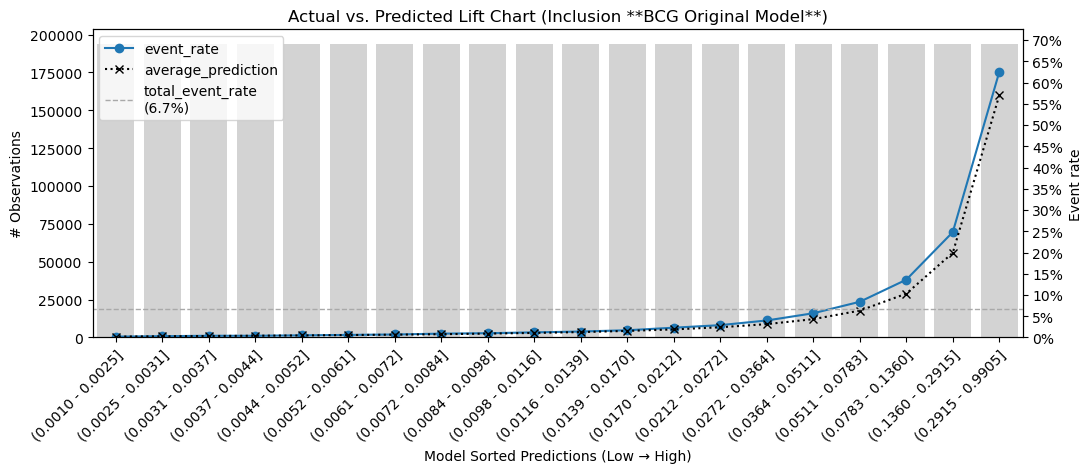

In [14]:
lift_curve(f'Inclusion **BCG Original Model**', calculate_decile_table(incl, 20))

(1937075, 30) (1936814, 30)


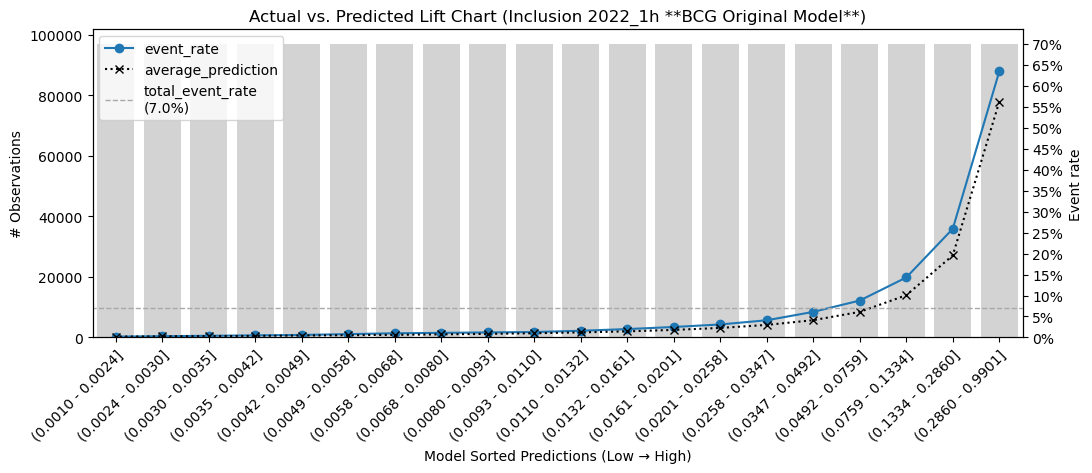

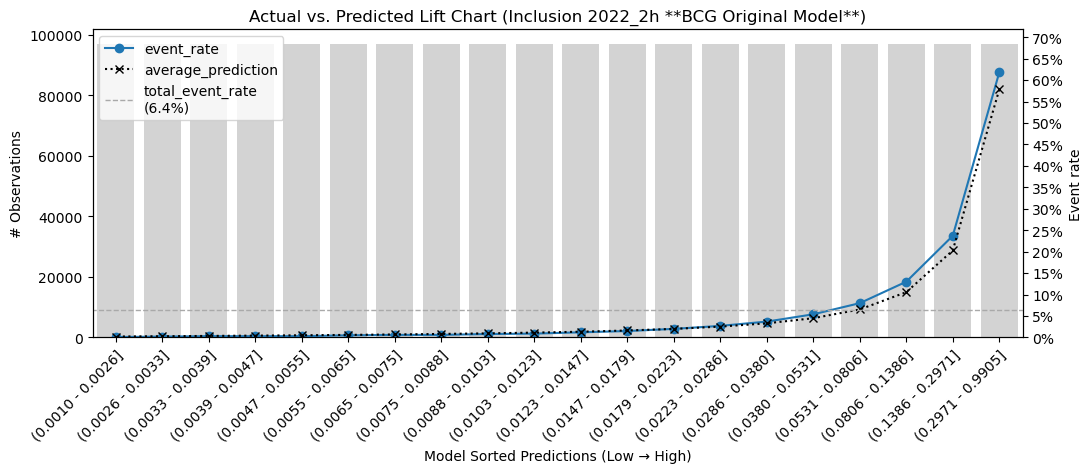

In [15]:
incl_by_year = split_data_by_year(incl)

for y in incl_by_year:
    lift_curve(f'Inclusion {y} **BCG Original Model**', calculate_decile_table(incl_by_year[y], 20))

In [16]:
def metrics_by_year(df_by_year):
    for y in df_by_year:
        fpr, tpr, threshold = roc_curve(df_by_year[y]['target'], df_by_year[y]['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        precision, recall, precision_recall_threshold = precision_recall_curve(df_by_year[y]['target'], df_by_year[y]['y_pred_proba'])
        pr_auc = auc(recall, precision)
        f1 = 2*precision*recall/(precision+recall)
        print(f'{y} - Count: {df_by_year[y].shape[0]} \nROC AUC: {roc_auc:.2f}\nPR AUC: {pr_auc:.2f}')

metrics_by_year(incl_by_year)

2022_1h - Count: 1937075 
ROC AUC: 0.90
PR AUC: 0.58
2022_2h - Count: 1936814 
ROC AUC: 0.92
PR AUC: 0.59


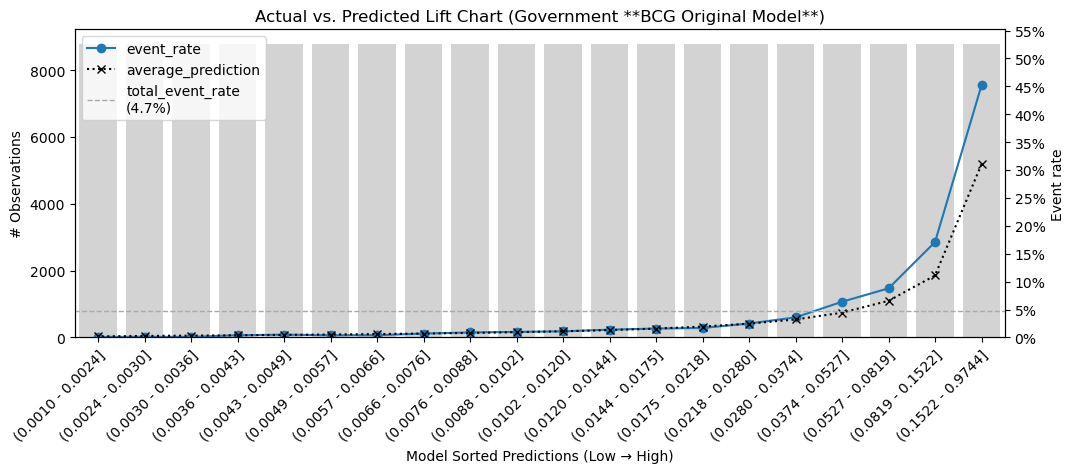

In [17]:
lift_curve(f'Government **BCG Original Model**', calculate_decile_table(gov, 20))

(86967, 30) (88715, 30)
2022_1h - Count: 86967 
ROC AUC: 0.89
PR AUC: 0.43
2022_2h - Count: 88715 
ROC AUC: 0.91
PR AUC: 0.45


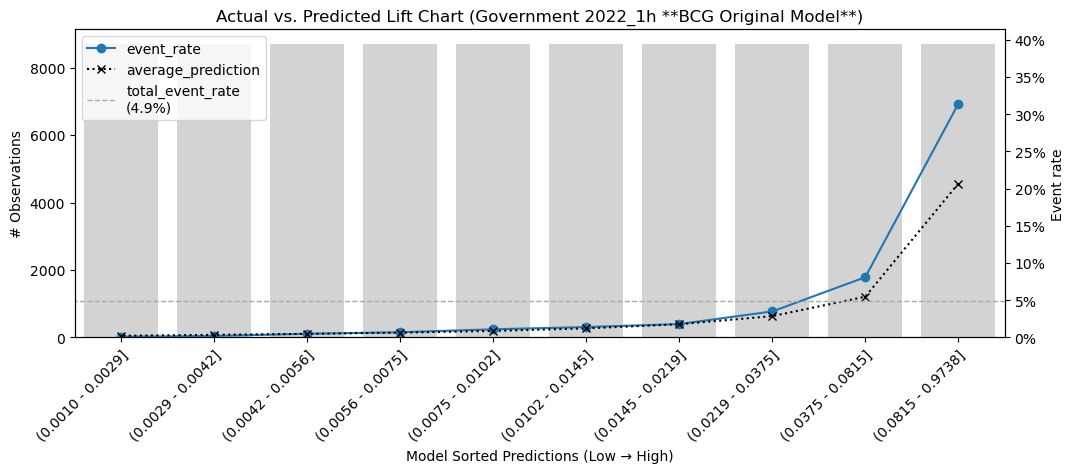

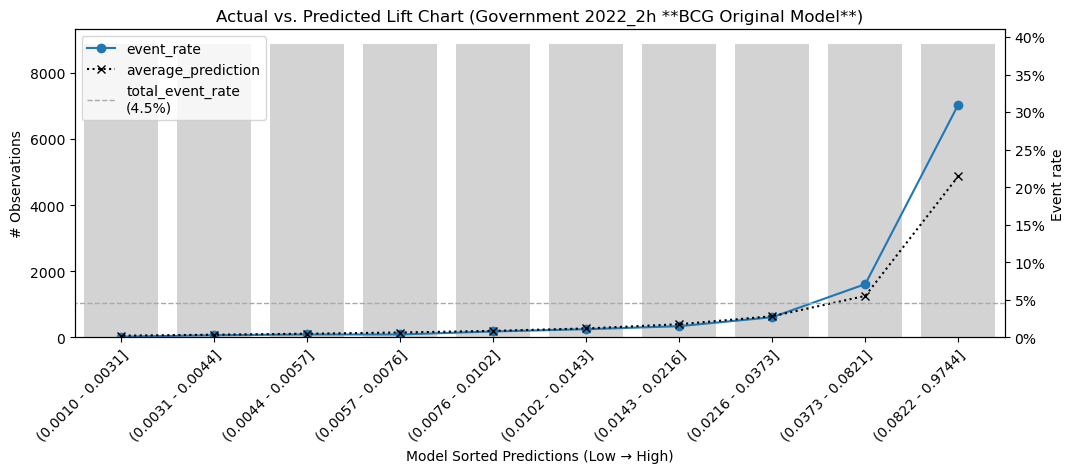

In [18]:
gov_by_year = split_data_by_year(gov)

metrics_by_year(gov_by_year)

for y in gov_by_year:
    lift_curve(f'Government {y} **BCG Original Model**', calculate_decile_table(gov_by_year[y], 10))

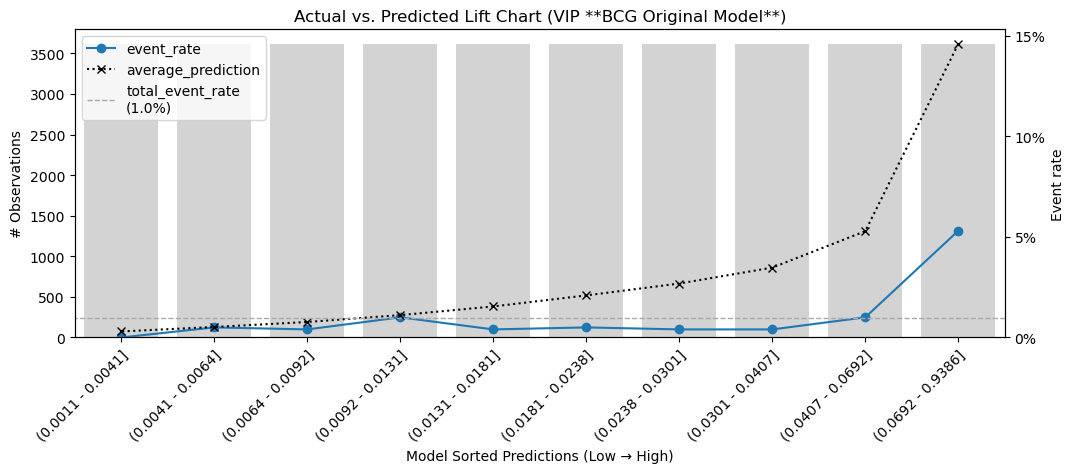

In [19]:
lift_curve(f'VIP **BCG Original Model**', calculate_decile_table(vip, 10))

(17222, 30) (18920, 30)
2022_1h - Count: 17222 
ROC AUC: 0.77
PR AUC: 0.16
2022_2h - Count: 18920 
ROC AUC: 0.78
PR AUC: 0.21


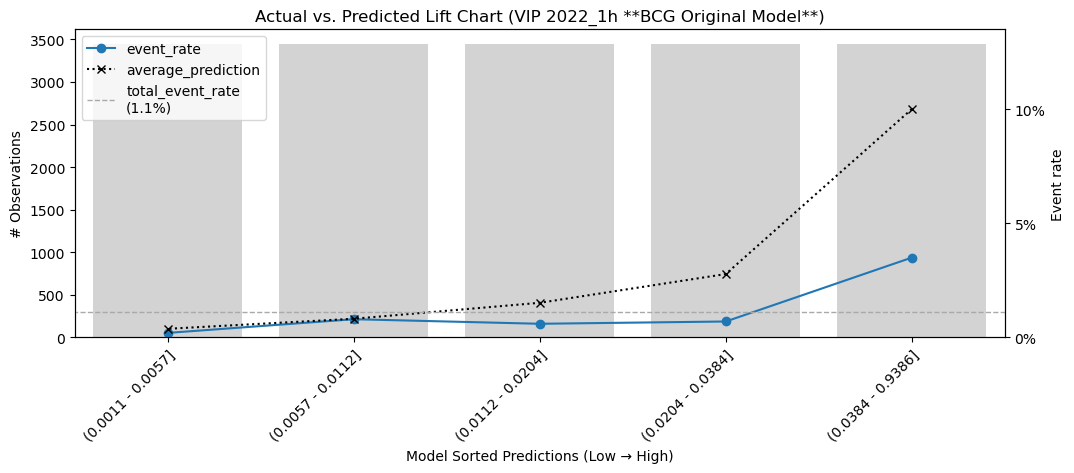

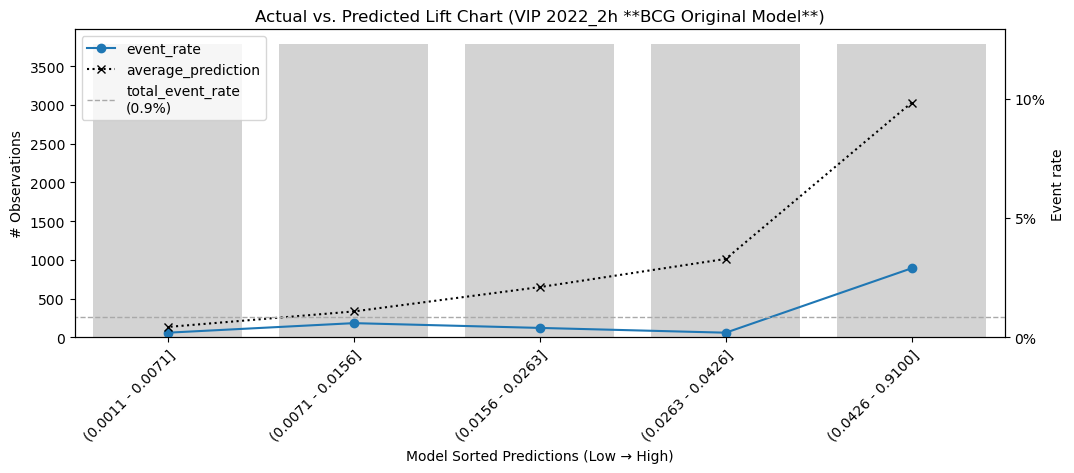

In [20]:
vip_by_year = split_data_by_year(vip)

metrics_by_year(vip_by_year)

for y in vip_by_year:
    lift_curve(f'VIP {y} **BCG Original Model**', calculate_decile_table(vip_by_year[y], 5))

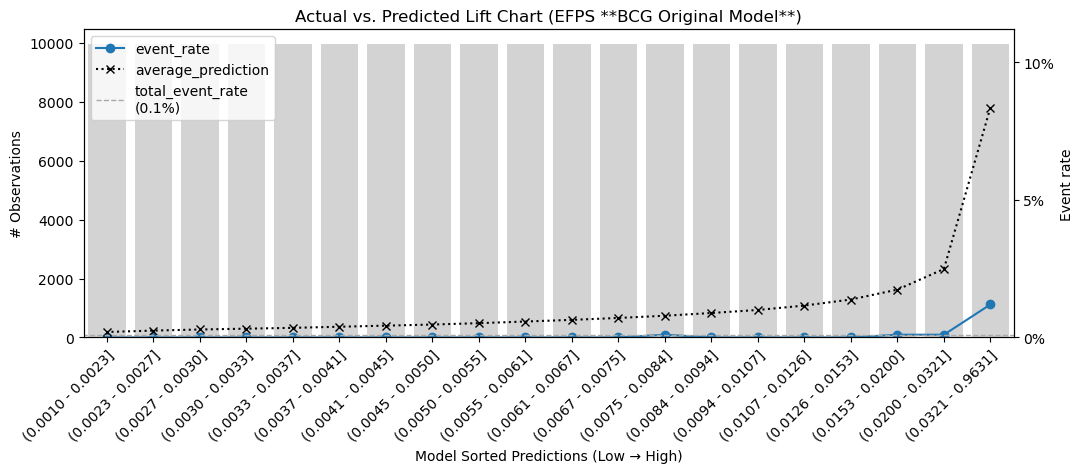

In [21]:
lift_curve(f'EFPS **BCG Original Model**', calculate_decile_table(efps, 20))

(92853, 30) (106457, 30)
2022_1h - Count: 92853 
ROC AUC: 0.90
PR AUC: 0.12
2022_2h - Count: 106457 
ROC AUC: 0.95
PR AUC: 0.26


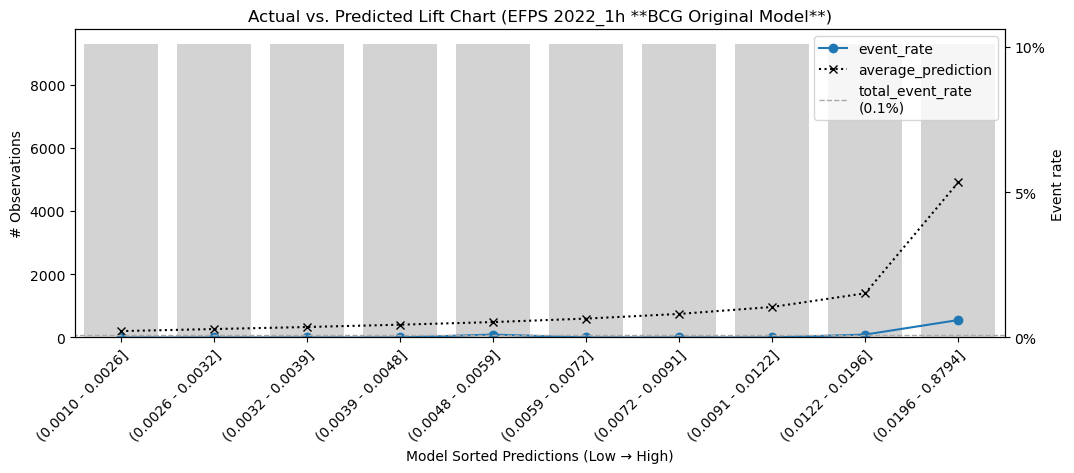

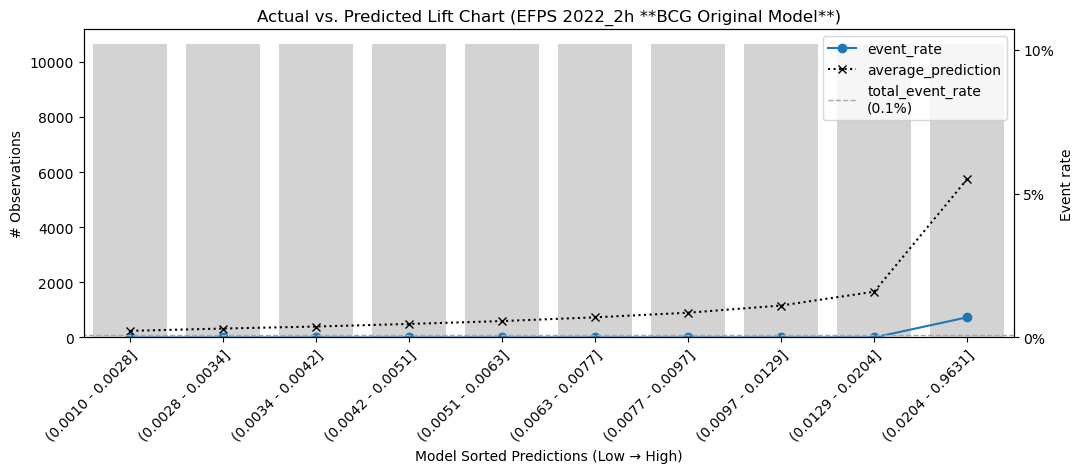

In [22]:
efps_by_year = split_data_by_year(efps)

metrics_by_year(efps_by_year)

for y in efps_by_year:
    lift_curve(f'EFPS {y} **BCG Original Model**', calculate_decile_table(efps_by_year[y], 10))

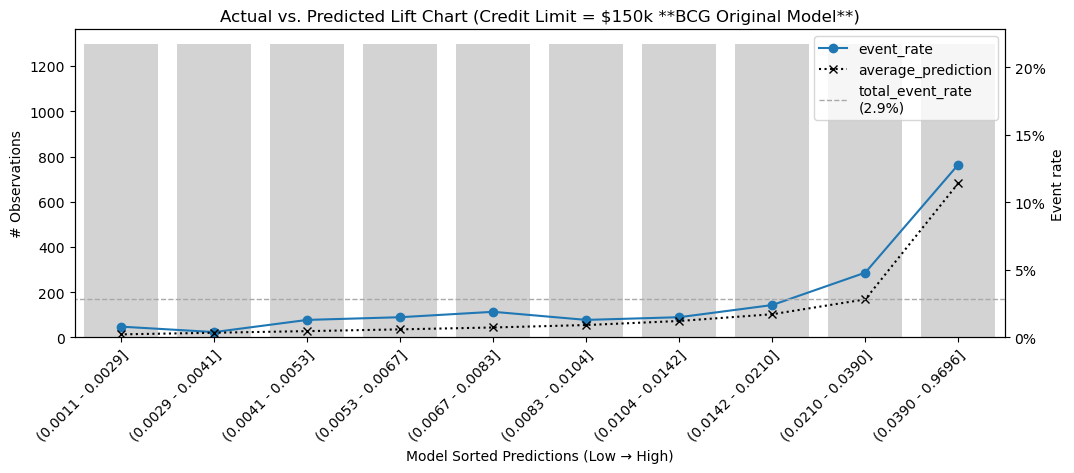

In [23]:
lift_curve(f'Credit Limit = $150k **BCG Original Model**', calculate_decile_table(at_150k, 10))

(4504, 30) (8458, 30)
2022_1h - Count: 4504 
ROC AUC: 0.71
PR AUC: 0.15
2022_2h - Count: 8458 
ROC AUC: 0.80
PR AUC: 0.23


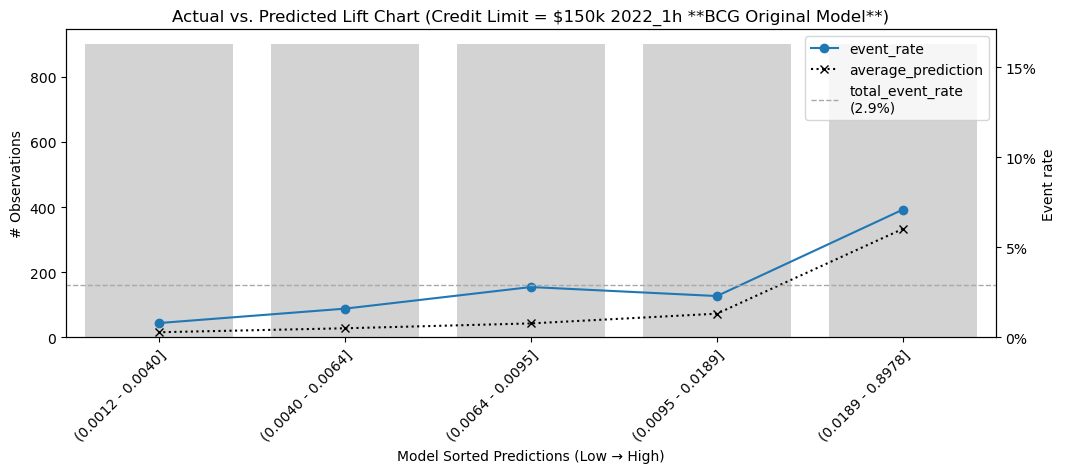

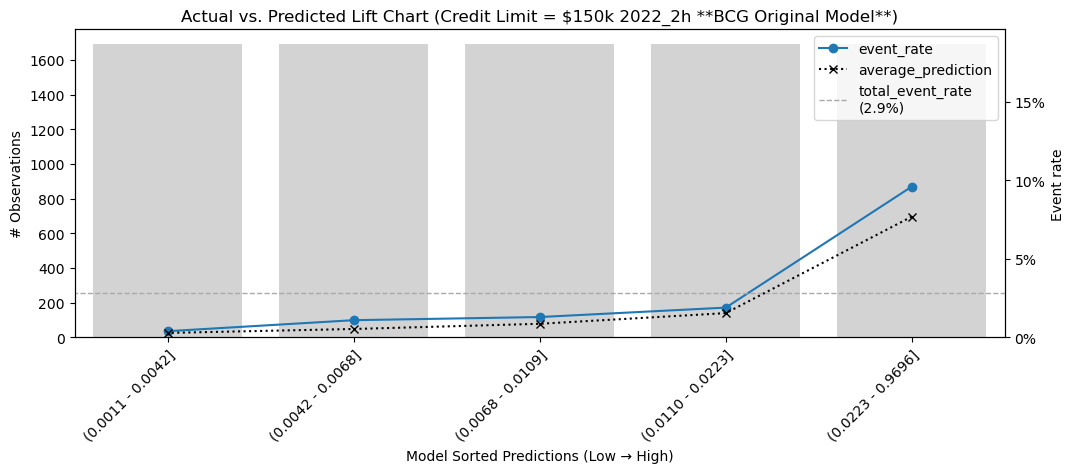

In [24]:
at_150k_by_year = split_data_by_year(at_150k)

metrics_by_year(at_150k_by_year)

for y in at_150k_by_year:
    lift_curve(f'Credit Limit = $150k {y} **BCG Original Model**', calculate_decile_table(at_150k_by_year[y], 5))

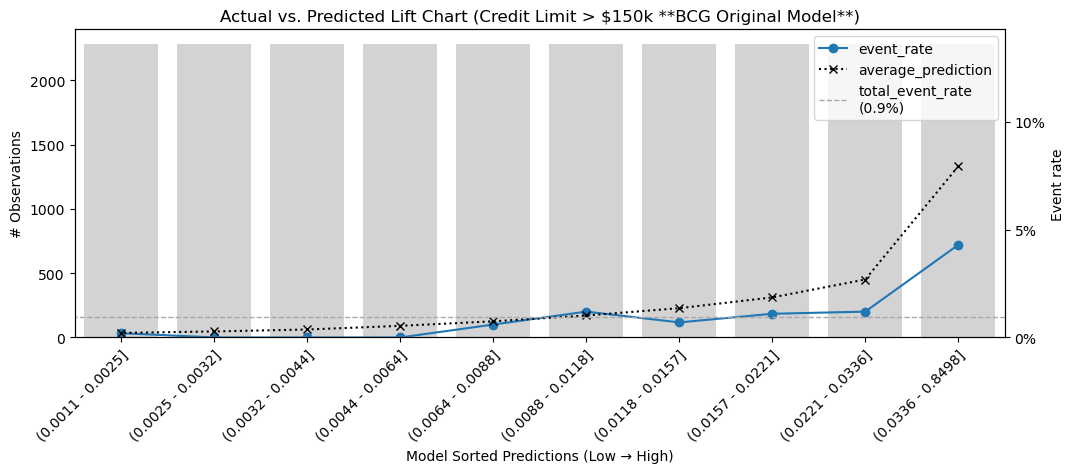

In [25]:
lift_curve(f'Credit Limit > $150k **BCG Original Model**', calculate_decile_table(over_150k, 10))

(11231, 30) (11593, 30)
2022_1h - Count: 11231 
ROC AUC: 0.78
PR AUC: 0.05
2022_2h - Count: 11593 
ROC AUC: 0.83
PR AUC: 0.18


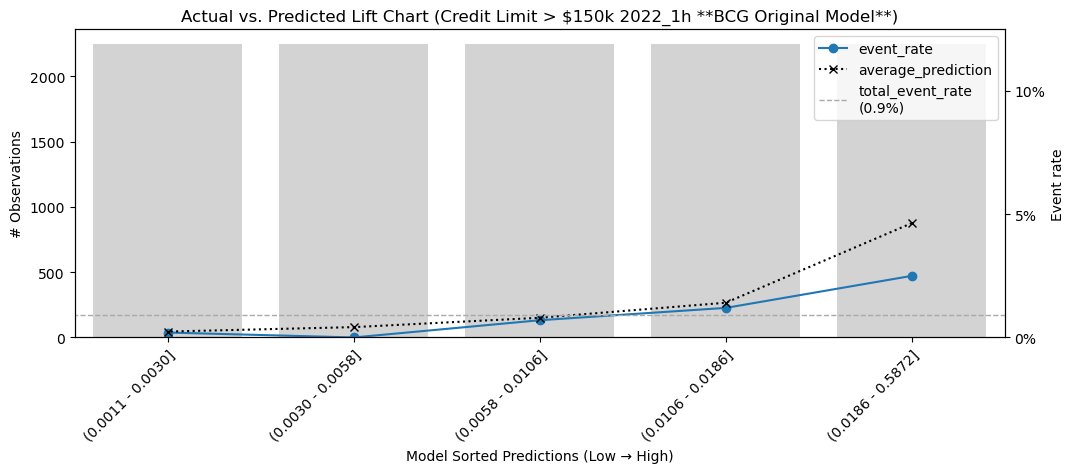

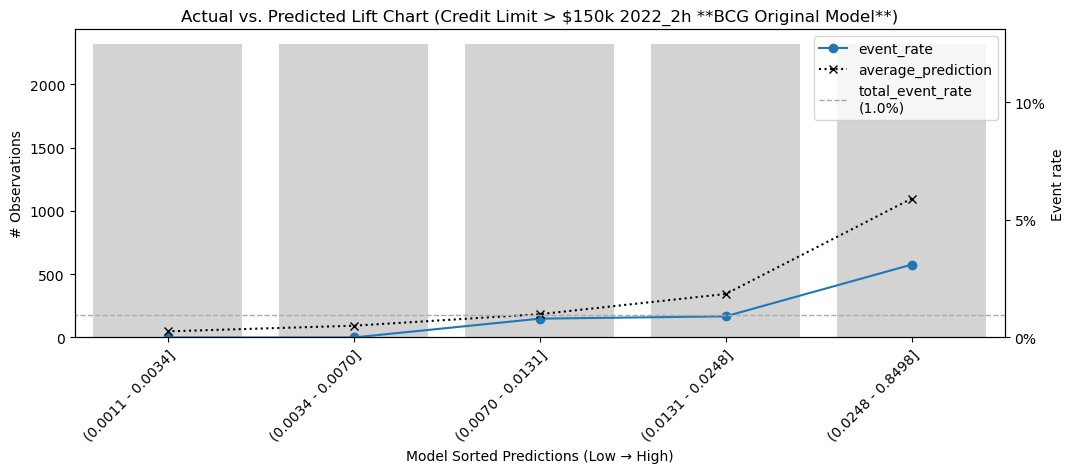

In [26]:
over_150k_by_year = split_data_by_year(over_150k)

metrics_by_year(over_150k_by_year)

for y in over_150k_by_year:
    lift_curve(f'Credit Limit > $150k {y} **BCG Original Model**', calculate_decile_table(over_150k_by_year[y], 5))

In [27]:
def calculate_decile_table_cl_bucket_manual(binded, feature, buckets, n):
    # Using mapping_dict to create CR_LIMIT_BUCKET. Each bucket will be greater than the value in mapping_dict
    # binded["CR_LIMIT_BUCKET"] = binded[feature].map(mapping_dict)
    binded["TOTAL_EVENT_RATE"] =  binded["target"].mean()

    # binded = binded.sort_values("CR_LIMIT", ascending = False)
    binded["CR_LIMIT_BUCKET"] = pd.cut(binded["CR_LIMIT"], bins = buckets, labels = list(range(0, n, 1)))
    binded["TOTAL_EVENT_RATE"] =  binded["target"].mean()

    # Calculate the number of accounts and default accounts for each decile
    decile_df = binded.groupby("CR_LIMIT_BUCKET").agg(
        COUNT=("CR_LIMIT", "count"),
        DEFAULT=("target", "sum"),
        TOTAL_EVENT_RATE=("TOTAL_EVENT_RATE", "mean")
    ).reset_index()

    # Calculate the predicted probability range for each decile
    decile_df["CR_LIMIT_RANGE"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["min", "max"]).apply(lambda x: f"{x['min']:,.0f} - {x['max']:,.0f}", axis=1).values
    decile_df["AVG_CL_LIMIT"] = binded.groupby("CR_LIMIT_BUCKET")["CR_LIMIT"].agg(["mean"]).values
    decile_df["AVG_CL_LIMIT"] = round(decile_df["AVG_CL_LIMIT"]).astype(int).apply(lambda x: "{:,}".format(x))

    # Calculate the predicted probability range for each decile
    decile_df["PROB_RANGE"] = binded.groupby("CR_LIMIT_BUCKET")["y_pred_proba"].agg(["min", "max"]).apply(lambda x: f"{x['min']:.3f} - {x['max']:.3f}", axis=1).values
    decile_df["AVG_PROB"] = binded.groupby("CR_LIMIT_BUCKET")["y_pred_proba"].agg(["mean"]).values
    decile_df["AVG_PROB"] = round(decile_df["AVG_PROB"], 4)

    # sort dataframes by decile
    decile_df = decile_df.sort_values(by="CR_LIMIT_BUCKET", ascending=False)

    # Calculate the cumulative number of accounts and default accounts
    decile_df["CUM_COUNT"] = round(decile_df["COUNT"].cumsum(),0)
    decile_df["CUM_DEFAULT"] = decile_df["DEFAULT"].cumsum()

    # Calculate the cumulative percentage of accounts and default accounts
    decile_df["CUM_PCT_COUNT"] = round(decile_df["CUM_COUNT"] / decile_df["COUNT"].sum() * 100, 3)
    decile_df["CUM_PCT_DEFAULT"] = round((decile_df["CUM_DEFAULT"] / decile_df["DEFAULT"].sum()), 3)

    # Calculate the default rate for each decile
    decile_df["DEFAULT_RATE"] = round((decile_df["DEFAULT"] / decile_df["COUNT"]), 3)

    # Calculate gain for each decile
    decile_df["GAIN"] = round((decile_df["CUM_DEFAULT"] / binded["target"].sum()), 3)

    # Calculate the lift for each decile
    decile_df["LIFT"] = round((decile_df["GAIN"]*100) / (decile_df["CUM_PCT_COUNT"]), 3)

    cols_to_display = [
        "CR_LIMIT_BUCKET",
        "CR_LIMIT_RANGE", 
        "AVG_CL_LIMIT", "PROB_RANGE", "AVG_PROB", "COUNT", "DEFAULT_RATE", "TOTAL_EVENT_RATE", "CUM_COUNT", "CUM_DEFAULT", "CUM_PCT_DEFAULT",
        "GAIN", "LIFT", "CUM_PCT_COUNT"
    ]

    decile_df = decile_df[cols_to_display]

    return decile_df


def cr_limit_lift_curve(name, df_binned):
    event_rate = df_binned["TOTAL_EVENT_RATE"].astype(float).mean()

    # Build event rate plot
    fig = plt.figure(figsize=(12,4))

    # Plot barplot containing number of observations
    plt.bar(df_binned.index, df_binned["COUNT"], color="lightgray")

    # Add ticks & laels to axis
    plt.xlabel("CR_LIMIT_BUCKET")
    plt.ylabel("# Observations")
    plt.xticks(df_binned.index, df_binned["CR_LIMIT_RANGE"], rotation=45, ha='right', rotation_mode='anchor')
    plt.title(f"{name}")

    # Mirror plot and add event rates
    plt2 = plt.twinx()
    plt2.set_ylabel("Event rate")
    plt2.set_ylim(ymin=0, ymax=df_binned["DEFAULT_RATE"].max() + 0.1)
    plt2.set_yticks(np.arange(0, df_binned["AVG_PROB"].max() + 0.1, step=0.02))
    plt2.plot(
        df_binned.index, df_binned["DEFAULT_RATE"], label="event_rate", marker="o"
    )

    # add average prediction
    plt2.plot(
        df_binned.index,
        df_binned["AVG_PROB"],
        label="average_prediction",
        marker="x",
        linestyle=":",
        color="black"
    )

    # Add global event rate as baseline
    plt2.plot(
        [min(df_binned.index) - 1, max(df_binned.index) + 1],
        [event_rate, event_rate],
        color="darkgrey",
        lw=1,
        linestyle="--",
        label=f"total_event_rate\n({'{:.1%}'.format(event_rate)})",
    )
    plt2.legend(loc=0)
    plt2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

    plt2.yaxis.grid(False)
    plt2.set_xlim([min(df_binned.index) - 0.5, max(df_binned.index) + 0.5])

    plt.show()

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
9,9,"140,075 - 149,999","145,287",0.001 - 0.877,0.0195,2684,0.026,0.066694,2684,71,0.000,0.000,0.000,0.069
8,8,"120,042 - 140,000","129,835",0.001 - 0.964,0.0229,8359,0.034,0.066694,11043,357,0.001,0.001,0.351,0.285
7,7,"100,029 - 120,000","110,741",0.001 - 0.984,0.0227,14689,0.031,0.066694,25732,811,0.003,0.003,0.452,0.664
6,6,"50,029 - 100,000","69,805",0.001 - 0.990,0.0251,105963,0.033,0.066694,131695,4313,0.017,0.017,0.500,3.400
5,5,"25,001 - 50,000","35,148",0.001 - 0.990,0.0288,223994,0.036,0.066694,355689,12358,0.048,0.048,0.523,9.182
4,4,"10,001 - 25,000","15,940",0.001 - 0.990,0.0374,629262,0.044,0.066694,984951,39872,0.154,0.154,0.606,25.425
3,3,"5,000 - 10,000","7,455",0.001 - 0.990,0.0531,736424,0.064,0.066694,1721375,86649,0.335,0.335,0.754,44.435
2,2,"2,500 - 5,000","3,768",0.001 - 0.989,0.0561,789900,0.065,0.066694,2511275,138245,0.535,0.535,0.825,64.826
1,1,"1,000 - 2,500","1,779",0.001 - 0.987,0.0636,802758,0.072,0.066694,3314033,196387,0.760,0.760,0.888,85.548
0,0,"100 - 1,000",707,0.001 - 0.986,0.0942,559856,0.111,0.066694,3873889,258367,1.000,1.000,1.000,100.000


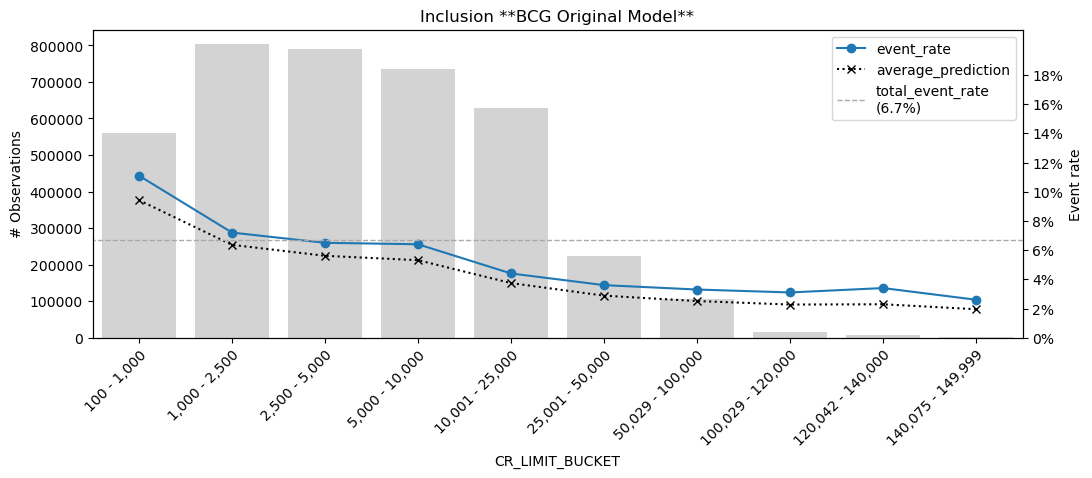

In [28]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 120000,
                9: 140000,
                # 10: 1000000,
                # 11: 2000000,
                12: np.inf
}

inclusion_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    inclusion_buckets.append(mapping_dict[m])

inclusion_decile_manual = calculate_decile_table_cl_bucket_manual(incl, 'y_pred_proba', inclusion_buckets, n)
display(inclusion_decile_manual)

cr_limit_lift_curve('Inclusion **BCG Original Model**', inclusion_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
11,11,"2,150,000 - 10,000,000","4,545,453",0.003 - 0.736,0.0717,165,0.036,0.047045,165,6,0.001,0.001,1.064,0.094
10,10,"1,019,000 - 2,000,000","1,476,776",0.003 - 0.808,0.0603,357,0.062,0.047045,522,28,0.003,0.003,1.010,0.297
9,9,"510,000 - 1,000,000","768,431",0.002 - 0.947,0.0476,424,0.026,0.047045,946,39,0.005,0.005,0.929,0.538
8,8,"155,200 - 500,000","273,034",0.001 - 0.740,0.0461,2076,0.097,0.047045,3022,241,0.029,0.029,1.686,1.720
7,7,"100,200 - 150,000","130,653",0.001 - 0.730,0.0244,2696,0.027,0.047045,5718,315,0.038,0.038,1.167,3.255
6,6,"50,100 - 100,000","71,378",0.001 - 0.808,0.0284,7631,0.049,0.047045,13349,689,0.083,0.083,1.092,7.598
5,5,"25,100 - 50,000","36,119",0.001 - 0.813,0.0270,13059,0.036,0.047045,26408,1155,0.140,0.140,0.931,15.032
4,4,"10,100 - 25,000","16,608",0.001 - 0.930,0.0288,29361,0.043,0.047045,55769,2408,0.291,0.291,0.917,31.744
3,3,"5,012 - 10,000","7,519",0.001 - 0.916,0.0295,28188,0.040,0.047045,83957,3528,0.427,0.427,0.894,47.789
2,2,"2,500 - 5,000","3,740",0.001 - 0.974,0.0351,31256,0.048,0.047045,115213,5031,0.609,0.609,0.929,65.580


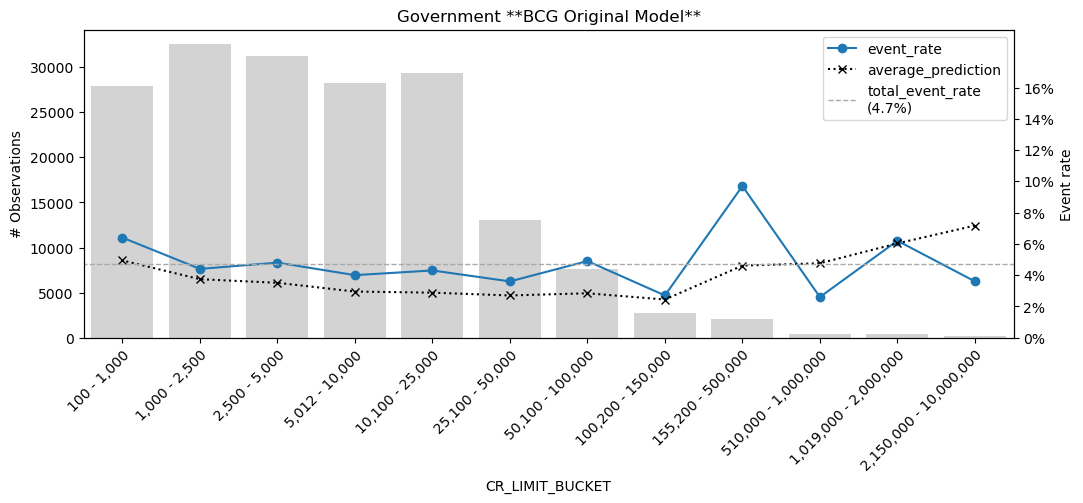

In [29]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 150000,
                9: 500000,
                10: 1000000,
                11: 2000000,
                12: np.inf
}

gov_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    gov_buckets.append(mapping_dict[m])

gov_decile_manual = calculate_decile_table_cl_bucket_manual(gov, 'y_pred_proba', gov_buckets, n)
display(gov_decile_manual)

cr_limit_lift_curve('Government **BCG Original Model**', gov_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
11,11,"2,272,580 - 65,000,000","13,155,987",0.005 - 0.096,0.0270,252,0.000,0.009905,252,0,0.000,0.000,0.000,0.697
10,10,"1,065,000 - 2,000,000","1,235,716",0.002 - 0.078,0.0239,3194,0.000,0.009905,3446,0,0.000,0.000,0.000,9.535
9,9,"510,000 - 1,000,000","633,537",0.002 - 0.420,0.0371,61,0.000,0.009905,3507,0,0.000,0.000,0.000,9.703
8,8,"150,767 - 500,000","257,986",0.002 - 0.419,0.0409,336,0.000,0.009905,3843,0,0.000,0.000,0.000,10.633
7,7,"100,733 - 150,000","128,275",0.001 - 0.365,0.0186,365,0.000,0.009905,4208,0,0.000,0.000,0.000,11.643
6,6,"50,200 - 100,000","71,481",0.001 - 0.819,0.0277,1041,0.017,0.009905,5249,18,0.050,0.050,0.344,14.523
5,5,"25,100 - 50,000","35,670",0.001 - 0.810,0.0262,2121,0.005,0.009905,7370,29,0.081,0.081,0.397,20.392
4,4,"10,100 - 25,000","16,262",0.001 - 0.536,0.0284,5266,0.006,0.009905,12636,60,0.168,0.168,0.481,34.962
3,3,"5,040 - 10,000","7,478",0.001 - 0.939,0.0331,7039,0.004,0.009905,19675,85,0.237,0.237,0.435,54.438
2,2,"2,550 - 5,000","3,880",0.001 - 0.913,0.0336,6864,0.010,0.009905,26539,152,0.425,0.425,0.579,73.430


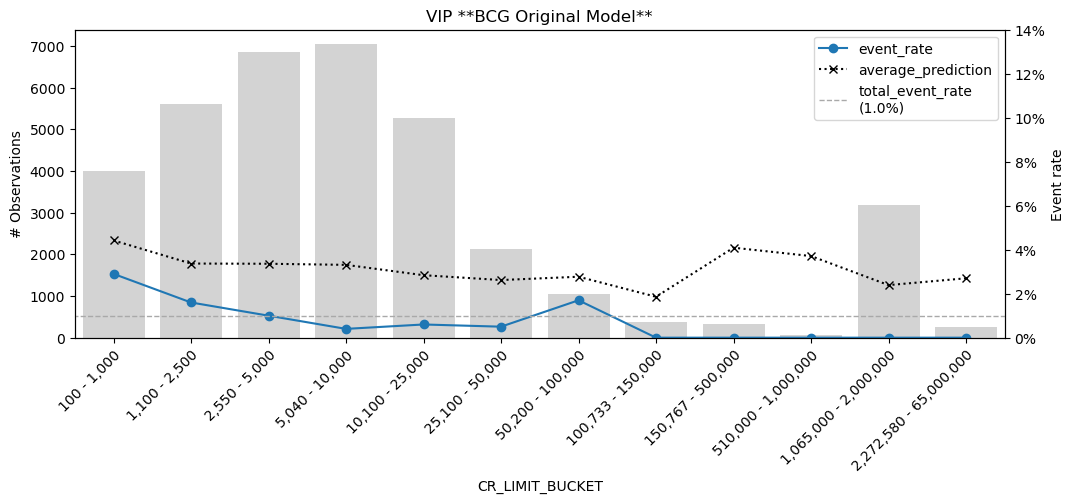

In [30]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 150000,
                9: 500000,
                10: 1000000,
                11: 2000000,
                12: np.inf
}

vip_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    vip_buckets.append(mapping_dict[m])

vip_decile_manual = calculate_decile_table_cl_bucket_manual(vip, 'y_pred_proba', vip_buckets, n)
display(vip_decile_manual)

cr_limit_lift_curve('VIP **BCG Original Model**', vip_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
10,10,"2,230,000 - 10,500,000","5,705,977",0.003 - 0.120,0.0180,86,0.000,0.000833,86,0,0.000,0.000,0.000,0.043
9,9,"1,100,000 - 2,000,000","1,474,677",0.002 - 0.134,0.0170,62,0.000,0.000833,148,0,0.000,0.000,0.000,0.074
8,8,"151,910 - 1,000,000","336,673",0.001 - 0.136,0.0105,2544,0.000,0.000833,2692,0,0.000,0.000,0.000,1.351
7,7,"100,100 - 150,000","133,097",0.001 - 0.199,0.0087,5139,0.000,0.000833,7831,0,0.000,0.000,0.000,3.929
6,6,"50,040 - 100,000","71,717",0.001 - 0.342,0.0089,10259,0.000,0.000833,18090,0,0.000,0.000,0.000,9.076
5,5,"25,021 - 50,000","35,784",0.001 - 0.734,0.0098,17814,0.000,0.000833,35904,1,0.006,0.006,0.033,18.014
4,4,"10,002 - 25,000","16,310",0.001 - 0.839,0.0106,38306,0.000,0.000833,74210,7,0.042,0.042,0.113,37.233
3,3,"5,001 - 10,000","7,441",0.001 - 0.862,0.0107,38949,0.001,0.000833,113159,29,0.175,0.175,0.308,56.775
2,2,"2,500 - 5,000","3,748",0.001 - 0.847,0.0106,37882,0.001,0.000833,151041,52,0.313,0.313,0.413,75.782
1,1,"1,004 - 2,500","1,801",0.001 - 0.948,0.0129,32392,0.001,0.000833,183433,92,0.554,0.554,0.602,92.034


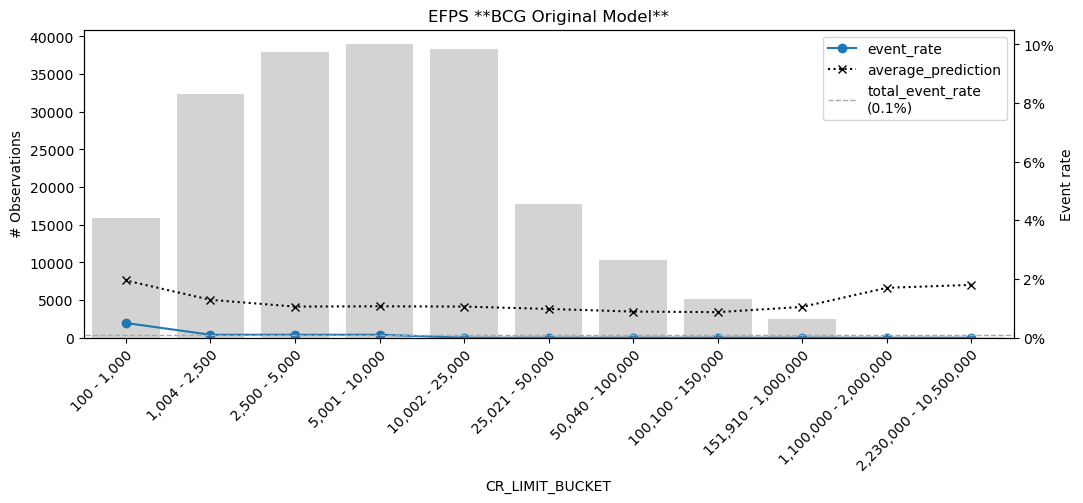

In [31]:
mapping_dict = {0: 1000,
                1: 2500,
                3: 5000,
                4: 10000,
                5: 25000,
                6: 50000,
                7: 100000,
                8: 150000,
                9: 1000000,
                # 10: 1500000,
                11: 2000000,
                12: np.inf
}

efps_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    efps_buckets.append(mapping_dict[m])

efps_decile_manual = calculate_decile_table_cl_bucket_manual(df_list['efps'], 'y_pred_proba', efps_buckets, n)
display(efps_decile_manual)

cr_limit_lift_curve('EFPS **BCG Original Model**', efps_decile_manual)

,CR_LIMIT_BUCKET,CR_LIMIT_RANGE,AVG_CL_LIMIT,PROB_RANGE,AVG_PROB,COUNT,DEFAULT_RATE,TOTAL_EVENT_RATE,CUM_COUNT,CUM_DEFAULT,CUM_PCT_DEFAULT,GAIN,LIFT,CUM_PCT_COUNT
7,7,"10,028,000 - 30,000,000","16,562,348",0.004 - 0.204,0.0466,77,0.169,0.009376,77,13,0.061,0.061,18.101,0.337
6,6,"2,008,961 - 10,000,000","4,332,881",0.002 - 0.483,0.0322,554,0.022,0.009376,631,25,0.117,0.117,4.231,2.765
5,5,"1,000,600 - 2,000,000","1,360,879",0.002 - 0.403,0.0159,4661,0.000,0.009376,5292,25,0.117,0.117,0.505,23.186
4,4,"503,025 - 1,000,000","720,192",0.002 - 0.850,0.0181,3033,0.015,0.009376,8325,70,0.327,0.327,0.897,36.475
3,3,"400,596 - 500,000","465,215",0.001 - 0.520,0.0238,953,0.010,0.009376,9278,80,0.374,0.374,0.920,40.650
2,2,"300,398 - 400,000","345,837",0.001 - 0.464,0.0101,2211,0.010,0.009376,11489,102,0.477,0.477,0.948,50.337
1,1,"200,100 - 300,000","249,688",0.001 - 0.846,0.0141,5579,0.008,0.009376,17068,147,0.687,0.687,0.919,74.781
0,0,"150,163 - 200,000","186,005",0.001 - 0.587,0.0199,5756,0.012,0.009376,22824,214,1.000,1.000,1.000,100.000


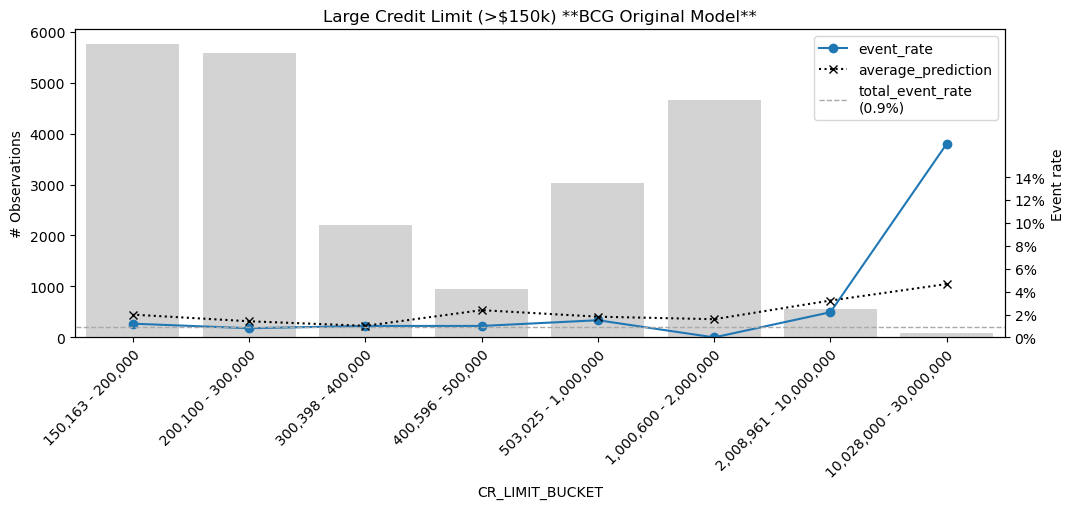

In [32]:
mapping_dict = {0: 200000,
                # 1: 200000,
                2: 300000,
                3: 400000,
                4: 500000,
                # 5: 600000,
                # 6: 700000,
                # 7: 800000,
                # 8: 900000,
                9: 1000000,
                10: 2000000,
                11: 10000000,
                12: np.inf
}

large_credit_limit_buckets = [-np.inf]
n = len(mapping_dict)

for m in mapping_dict:
    large_credit_limit_buckets.append(mapping_dict[m])

large_credit_limit_decile_manual = calculate_decile_table_cl_bucket_manual(over_150k, 'y_pred_proba', large_credit_limit_buckets, n)
display(large_credit_limit_decile_manual)

cr_limit_lift_curve('Large Credit Limit (>$150k) **BCG Original Model**', large_credit_limit_decile_manual)

In [33]:
def roc_auc_pr_auc_plot(p):
    # Plot ROC-AUC and PR-AUC side by side
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    lines = plt.plot(fpr[p], tpr[p], color='#1f77b4', lw=2, label=f'proba_1 (ROC-AUC = {roc_auc[p]:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=.5, linestyle='--')
    labels = [l.get_label() for l in lines]
    # plot legend outside of plot
    plt.legend(lines, labels, loc='lower right')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title('Receiver Operating Characteristic (ROC) AUC Curve' , fontsize=12)

    plt.subplot(1, 2, 2)
    lines2 = plt.step(recall[p], precision[p], color='#ffc08a', where='post', label=f'proba_1 (PR-AUC = {pr_auc[p]:.2f})')
    labels2 = [l.get_label() for l in lines2]
    # move legend to lower center outside of plot
    plt.legend(lines2, labels2, loc='lower left')
    plt.xlabel('Recall', fontsize=10)
    plt.ylabel('Precision', fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title(f'Precision-Recall AUC Curve', fontsize=12)

    # plt.tight_layout()
    plt.show()

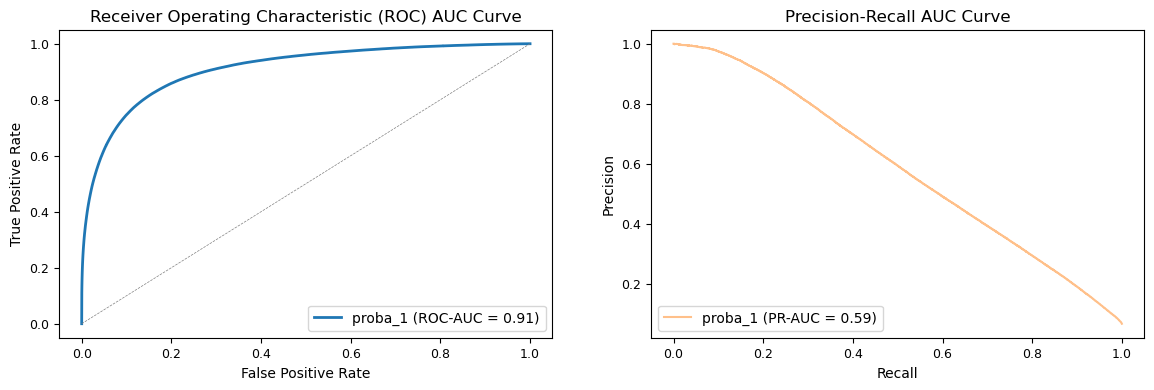

In [34]:
roc_auc_pr_auc_plot('Inclusion')

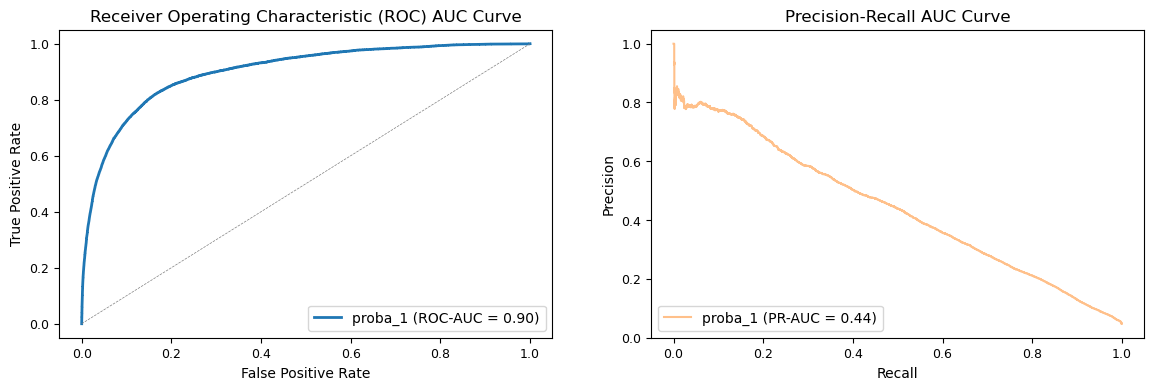

In [35]:
roc_auc_pr_auc_plot('GOV')

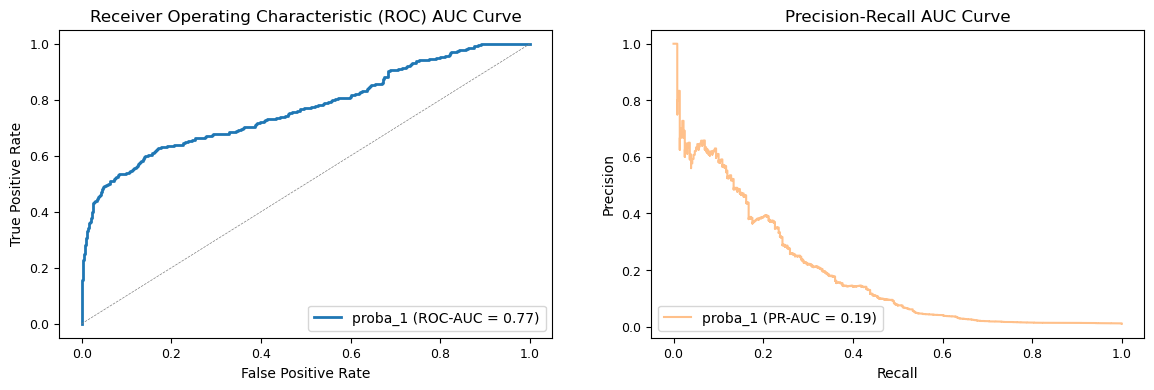

In [36]:
roc_auc_pr_auc_plot('VIP')

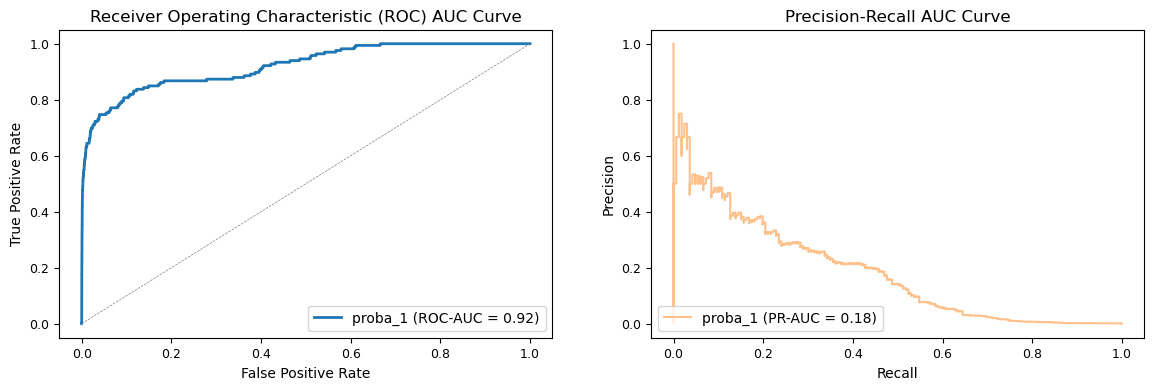

In [37]:
roc_auc_pr_auc_plot('EFPS')

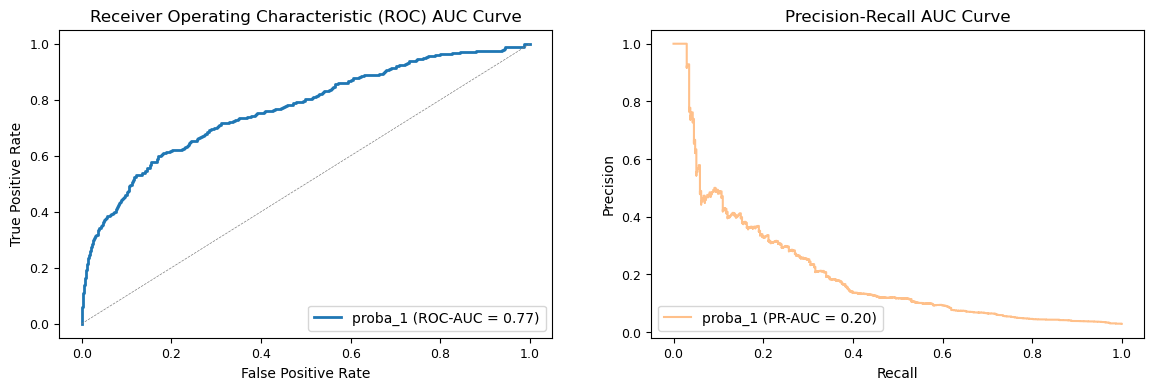

In [38]:
roc_auc_pr_auc_plot('150k Credit Limit')

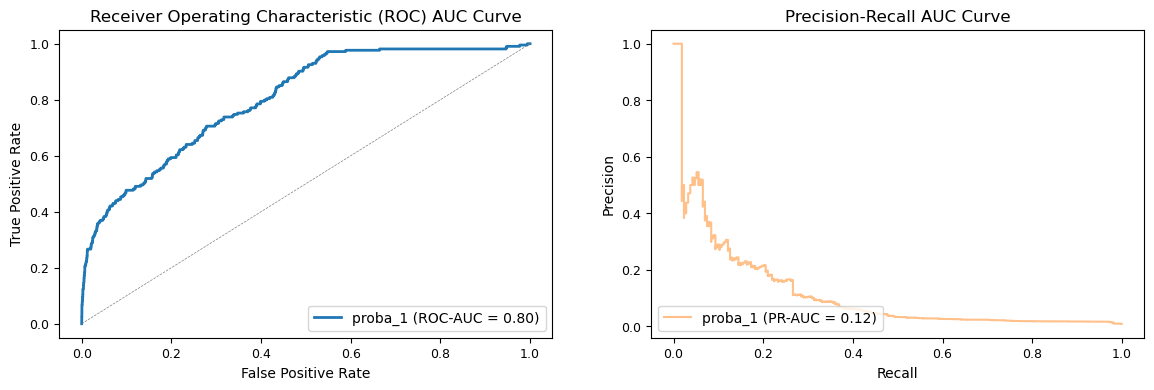

In [39]:
roc_auc_pr_auc_plot('Large Credit Limit')

In [40]:
 # change ref_date to date
df_combine['REF_DATE'] = pd.to_datetime(df_combine['REF_DATE'], format='%Y-%m-%d %H:%M:%S', utc=True)

# create datafram call df_combine_2021 which have ref_date in 2021
df_combine_2022 = df_combine[df_combine['REF_DATE'].dt.year == 2022]
print(df_combine_2022.shape)

(4320809, 30)


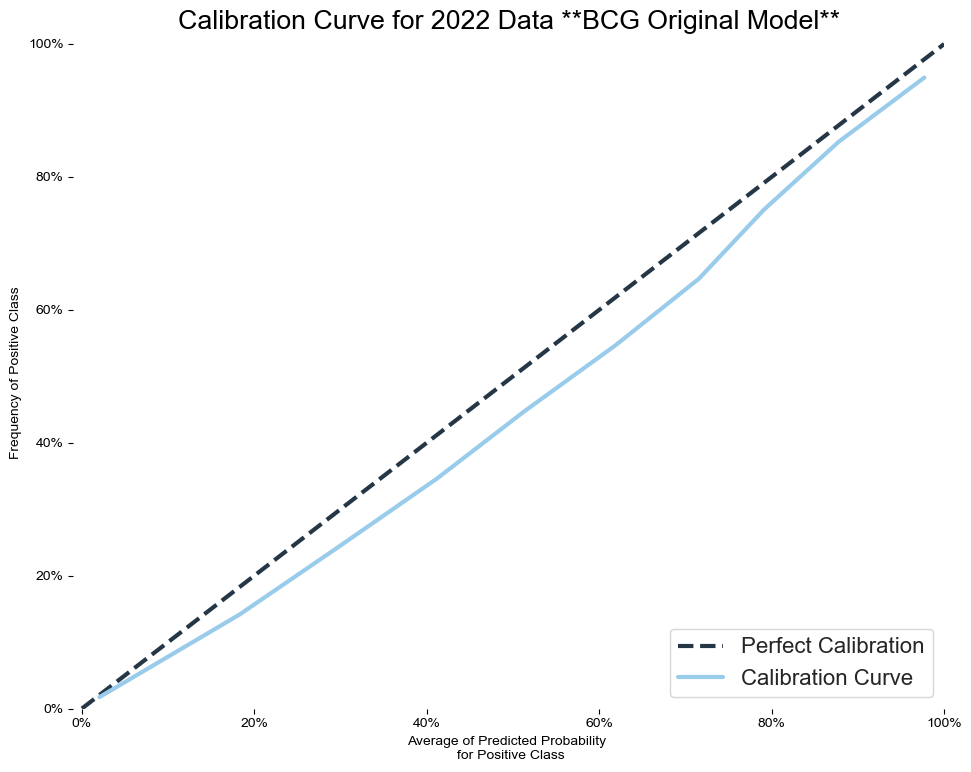

In [41]:
import matplotlib
import seaborn as sns
from sklearn.calibration import calibration_curve

## Build an AUC Plot
fig, ax = plt.subplots(figsize=(10,8))
lw = 3
matplotlib.rc('font', **{'size': 16})
plt.rcParams["hatch.linewidth"]=1.5

sns.set_style("whitegrid")

wx_red = (153/255,204/255,235/255)
wx_gray = (37/255,55/255,70/255)
wx_green = (37/255,55/255,70/255)

val_prob_true, val_prob_pred = calibration_curve(
    df_combine_2022['target'].astype(int),
    df_combine_2022['y_pred_proba'], 
    n_bins = 10
)

plt.plot([0, 1], [0, 1], color=wx_gray, lw=lw, linestyle="--", label='Perfect Calibration')
plt.plot(
    val_prob_true,
    val_prob_pred,
    color=wx_red,
    lw=lw,
    label=f"Calibration Curve",
)

sns.despine(
    top=True,
    bottom=True,
    left=True,
    right=True
)

ax.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0))
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0))

#ax.set_xticklabels([1, 20, 40, 60, 80, 100])

plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("Average of Predicted Probability \n for Positive Class")
plt.ylabel("Frequency of Positive Class")
plt.title("Calibration Curve for 2022 Data **BCG Original Model**")
plt.legend(loc="lower right")
plt.tight_layout()